In [11]:
def find_zeros_1D(f, x_range):
    x, xmin, xmax = x_range
    roots = [x0.rhs().n() for x0 in solve(f, x)]
    roots = [real(x0) for x0 in roots if abs(imag(x0)) < 1E-12]
    return [x0 for x0 in roots if xmin <= x0 <= xmax]

def plot_bifurcation_diagram(f, param_range, var_range, **options):
    parameter, param_min, param_max = param_range
    variable, var_min, var_max = var_range
    stable_style = {"color": "green", "linewidth": 3}
    unstable_style = {"color": "red", "linewidth": 3}
    bifpoints_style = {"color": "orange", "size": 50}
    options.setdefault("frame", False)
    options.setdefault("axes", True)
    options.setdefault("axes_labels", ("${}$".format(parameter), "${}$".format(variable)))
    df = diff(f, variable)

    # An eq point is stable if df/dx < 0
    stable_style.update(options)
    p = implicit_plot(f, param_range, var_range, region=-df, **stable_style)

    # An eq point is unstable if df/dx > 0
    unstable_style.update(options)
    p += implicit_plot(f, param_range, var_range, region=df, **unstable_style)

    if bifpoints_style:
        bifpoints = [(r.rhs().n(), x.rhs().n()) for r, x in solve((f, df), (parameter, variable))]
        for param_value, var_value in bifpoints:
            if not (param_value in RR and param_min <= param_value <= param_max and
                    var_value in RR and var_min <= var_value <= var_max):
                continue
            p += point((param_value, var_value), **bifpoints_style)
    return p


# Uptake of lactose by *E. coli*
 - ### Lactose can diffuse into cell, but having a channel is much faster.
 - ### The protein *lactose permease* creates a channel to import lactose.
 - ### BUT channel proteins like this take a lot of resources to build.
 - ### **Solution:** Build them only when there's plenty of lactose around.

<br>
<br>
<br>
<br>
<br>

# So here are the assumptions of our model: 
 - ### Let $X = $ lactose concentration in cell. 
 - ### Lactose in the cell is metabolized at a constant per-mass rate $r$. 
 - ### Rate of import of lactose is equal to the production rate of lactose permease. The production rate of lactose permease is low when $X$ is low, and higher when $X$ is high. 
 - ### But the cell can only produce so much lactose permease at a time. So the production rate ( = import rate of lactose) only increases up to some maximum, and then levels off. We will use a ***sigmoid function*** for this. (See below.) 


In [24]:
@interact
def lacoperon_sigmoid(show_saturation=False):
    import_rate(X) = 0.01 + X^2 / (1 + X^2)
    p1 = plot(import_rate(X), (X, 0, 5), color="black")
    p1 += text(r"$f(X) = 0.01 + \frac{X^2}{1 + X^2}$", (3.5, 0.5), fontsize=20, color="black")
    p2 = plot(1.01, (X, 0, 5), linestyle="dashed", color="fuchsia")
    p = p1 + p2 if show_saturation else p1
    p.show(ymin=0, ymax=1.5, aspect_ratio=2, figsize=10, 
           axes_labels=("$X$ (lactose concentration)", "Lactose import rate"))


Interactive function <function lacoperon_sigmoid at 0x7f08cd704048> with 1 widget
  show_saturation: Checkbox(…

<br>
<br>
<br>
<br>
<br>

### So the resulting differential equation is 
### $X' = [\text{import rate}] - [\text{metabolization rate}] = f(X) - rX$

### In other words, using the formula for the sigmoid function $f$ above: 
### $X' = 0.01 + \frac{X^2}{1 + X^2} - rX$

<br>
<br>
<br>
<br>
<br>

# Here is that same graph, showing the import rate in black, and the metabolization rate $rX$ in orange. 
### Remember the parameter $r$ represents the per-mass metabolization rate. 
### In this graph, we're using $r = 0.4$ (that is, 40%). 


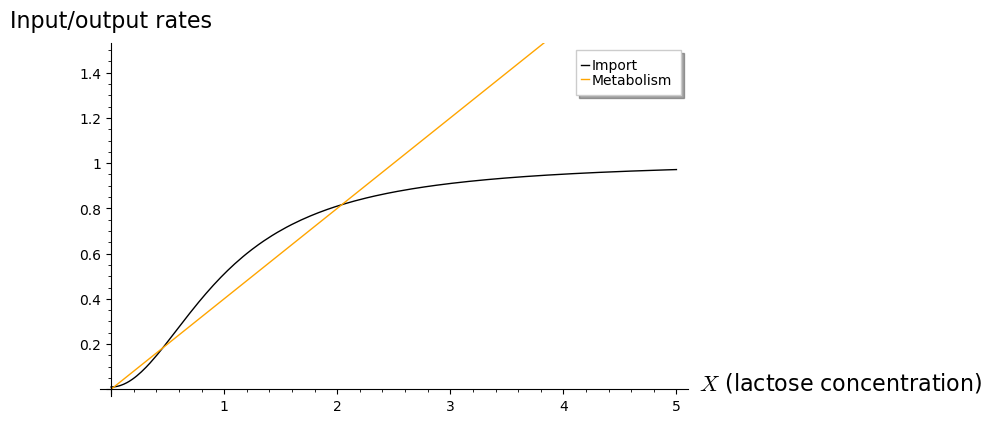

In [20]:
import_rate(X) = 0.01 + X^2 / (1 + X^2)
p = plot(import_rate(X), (X, 0, 5), color="black", legend_label="Import")
p += plot(0.4*X, (X, 0, 5), color="orange", legend_label="Metabolism")
p.show(ymin=0, ymax=1.5, aspect_ratio=2, figsize=10, axes_labels=("$X$ (lactose concentration)", "Input/output rates"))

### In a graph like the one above, you can see the equilibrium points as the $X$ values of the points where the two curves cross. And you can determine their stability using the *over-under method*. 

<br>
<br>
<br>
<br>
<br>

### The interactive below lets you manipulate the parameter $r$, and see the resulting equilibrium points and their stability. Pay particular attention to what happens as you increase $r$ (that is, make the orange line *steeper*). 


In [22]:
@interact
def lactose_equilibria(r=slider(0.2, 0.8, 0.01, label="$r$ (Metabolization rate)", default=0.4),
                        show_eqpts=checkbox(default=False, label="Show equilibrium points"), 
                        show_stability=checkbox(default=False, label="Include stability")):
    import_rate(X) = 0.01 + X^2 / (1 + X^2)
    metab_rate(X) = r*X
    p = plot(import_rate(X), (X, 0, 5), color="black", legend_label="Import rate")
    p += plot(metab_rate(X), (X, 0, 5), color="orange", legend_label="Metabolism rate")
    if show_eqpts:
        vectorfield(X) = import_rate(X) - metab_rate(X)
        vf_deriv(X) = diff(vectorfield(X), X)
        eqpts = find_zeros_1D(vectorfield, (X, 0, 5))
        for eqpt in eqpts:
            stability = vf_deriv(eqpt)
            if not show_stability:
                color = "purple"
            elif stability < 0:
                color = "green"
            elif stability > 0:
                color = "red"
            else:
                color = "orange"
            p += point((eqpt, 0), color=color, size=50)
    p.show(ymin=0, ymax=1.5, aspect_ratio=2, figsize=10, axes_labels=("$X$ (lactose concentration)", "Input/output rates"))


Interactive function <function lactose_equilibria at 0x7f08c78030d0> with 3 widgets
  r: TransformFloatSlider(…

<br>
<br>
<br>
<br>
<br>

<br>
<br>
<br>
<br>
<br>

<br>
<br>
<br>
<br>
<br>

# The bifurcation diagram of the *lac operon* model: 

### To build a bifurcation diagram, we put the parameter ($r$ in this case) on the horizontal axis, and the state variable ($X$) on the vertical axis. So each specific value of $r$ corresponds to a vertical slice of the diagram. We construct the diagram so that each of those vertical slices is a phase portrait of the model for that $r$ value, consisting of just the equilibrium points, colored to show their stability. 

<br>

### The interactive below lets you do the same thing as the one above, but for each $r$ value you choose, it adds a vertical slice to the bifurcation diagram on the right. 


In [36]:
xmin = 0
xmax = 3.1
lac_bif_diagram = point(((0.25, xmin), (0.8, xmax)), size=0, aspect_ratio=0.12, axes_labels=("$r$", "$X$"))

@interact
def lac_bifurc_diagram(r=slider(0.3, 0.8, 0.05, label="$r$ (Metabolization rate)", default=0.3)):
    global lac_bif_diagram
    import_rate(X) = 0.01 + X^2 / (1 + X^2)
    metab_rate(X) = r*X
    vectorfield(X) = import_rate(X) - metab_rate(X)
    vf_deriv(X) = diff(vectorfield(X), X)
    p = plot(import_rate(X), (X, xmin, xmax), color="black", legend_label="Import rate", 
             ymin=0, ymax=1.5, aspect_ratio=1.4, axes_labels=("$X$        ", "Input/output rates"))
    p += plot(metab_rate(X), (X, xmin, xmax), color="orange", legend_label="Metabolism rate")
    lac_bif_diagram += line(((r, xmin), (r, xmax)), color="lightgray", linestyle="dashed", thickness=1)
    eqpts = find_zeros_1D(vectorfield, (X, xmin, xmax))
    for eqpt in eqpts:
        stability = vf_deriv(eqpt)
        if stability < 0:
            color = "green"
            legend_label="Stable"
        elif stability > 0:
            color = "red"
            legend_label="Unstable"
        else:
            color = "orange"
        p += point((eqpt, 0), color=color, size=50)
        lac_bif_diagram += point((r, eqpt), color=color, size=50)
    both = graphics_array([[p, lac_bif_diagram]])
    both.show(figsize=11)


Interactive function <function lac_bifurc_diagram at 0x7f08cd096840> with 1 widget
  r: TransformFloatSlider(v…

<br>
<br>

Note: If you want to produce a more detailed diagram, you can change the sensitivity of the slider above by changing the ``0.05`` to something smaller, like ``0.02``. This is in the line that starts 

    def lactose_bif_diagram(r=slider(0.3, 0.8, 0.05, ...

<br>
<br>
<br>
<br>
<br>

<br>
<br>
<br>
<br>
<br>

<br>
<br>
<br>
<br>
<br>

# The completed bifurcation diagram of the *lac operon* model: 


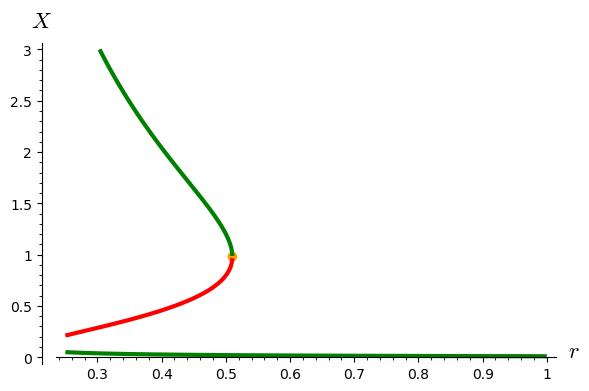

In [29]:
r, X = var("r, X")
p = plot_bifurcation_diagram(0.01 + X^2 / (1 + X^2) - r*X, (r, 0.25, 1), (X, -0.01, 3))
p.show(aspect_ratio="auto")

### The bifurcation seen here is called a ***saddle-node*** bifurcation. It happens when either 
- ### A pair of equilibrium points, one stable and one unstable, get closer and closer together until they collide and both disappear, or 
- ### Two completely new equilibrium points appear in a part of the state space where there were none before. The new pair consists of one stable and one unstable point, and as the parameter is increased they move farther apart. 
(Note that the second case above is just the reverse of the first case. That is, the reverse of what we see in the *lac operon* model.) 

<br>
<br>
<br>
<br>
<br>

<br>
<br>
<br>
<br>
<br>

<br>
<br>
<br>
<br>
<br>

# Bifurcations in the population of spruce budworms

### Spruce budworms (genus *Choristoneura*) are insects that feed on conifererous trees, such as spruce trees. Their population has a curious behavior: most of the time, the population remains at relatively low, manageable levels. (We will refer to this as the population being in ***refuge***.) But sometimes, as a result of particularly good conditions in their environment (i.e., high carrying capacity), there is a sudden and massive growth in the spruce budworm population. (We will refer to this as a population ***outbreak***.) The curious part is that, after such an outbreak, even after the environment returns to normal (i.e., after the carrying capacity drops back to its previous level), the spruce budworm population remains high! That is, it remains in outbreak. 

<br>

### Scientists have found that what keeps the population in refuge under normal conditions is that they are preyed upon by birds, most notably the Cape May warbler (*Setophaga tigrina*). 

### We will model the spruce budworm population using the following assumptions: 
- ### Let $N = $ the spruce budworm population. 
- ### In the absence of predation by birds, the population grows logistically, with a natural per-capita growth rate of $r$, and a carrying capacity of $k$. 
- ### The warbler population remains constant, as they have other food sources. But the warblers prey on the budworms at a rate that increases with the budworm population, but *only up to a certain level*: the warblers can only eat so much. Eventually, they get full. This means the predation rate will be a sigmoid function: $predation(N) = \frac{N^2}{1 + N^2}$

<br>
<br>
<br>
<br>
<br>

### So the resulting differential equation is 
### $N' = r \cdot N \cdot (1 - \frac{N}{k}) - \frac{N^2}{1 + N^2}$

<br>

### In everything below, we will assume $r$ is constant, and we will only vary $k$. Specifically, we will assume $r = 0.55$. 

<br>
<br>
<br>
<br>
<br>

### To study the equilibrium points, we will use a little trick. Start, as usual, with 
### $0.55 N \cdot (1 - \frac{N}{k}) - \frac{N^2}{1 + N^2} = 0$
### Note that we can factor out $N$ from this: 
### $N \cdot \bigg( 0.55 (1 - \frac{N}{k}) - \frac{N}{1 + N^2} \bigg) = 0$
### This means that, in this model, we will always have one equilibrium point at $N = 0$. 

<br>

### For the other factor, we have 
### $0.55 (1 - \frac{N}{k}) - \frac{N}{1 + N^2} = 0$
### We can rewrite this as 
### $0.55 (1 - \frac{N}{k}) = \frac{N}{1 + N^2}$
### and then use the over-under method on this, to deal with the remaining equilibrium points. 

<br>

### The interactive below shows the over-under method for this model. 


In [30]:
@interact
def spruce_budworm_equilibria(
            r=slider(0.3, 0.8, 0.01, label="$r$ (growth rate)", default=0.55), 
            k=slider(0.1, 15, 0.1, label="$k$ (carrying capacity)", default=3), 
            show_eqpts=checkbox(default=False, label="Show equilibrium points")):
    percap_growthrate(N) = r*(1 - N/k)
    percap_predationrate(N) = N/(1 + N^2)
    p = plot(percap_growthrate(N), (N, 0, 15), color="black", legend_label="Growth rate")
    p += plot(percap_predationrate(N), (N, 0, 15), color="orange", legend_label="Predation rate")
    if show_eqpts:
        vectorfield(N) = N*(percap_growthrate(N) - percap_predationrate(N))
        vf_deriv(N) = diff(vectorfield(N), N)
        eqpts = find_zeros_1D(vectorfield, (N, -0.01, 15))
        for eqpt in eqpts:
            stability = vf_deriv(eqpt)
            if stability < 0:
                color = "green"
            elif stability > 0:
                color = "red"
            else:
                color = "orange"
            p += point((eqpt, 0), color=color, size=50)
    p.show(xmax=15, ymin=0, ymax=0.7, aspect_ratio=10, figsize=10, 
           axes_labels=("$N$ (Population)", "(per capita) growth/\npredation rates"))


Interactive function <function spruce_budworm_equilibria at 0x7f08cd1c47b8> with 3 widgets
  r: TransformFloat…

<br>
<br>
<br>
<br>
<br>

<br>
<br>
<br>
<br>
<br>

<br>
<br>
<br>
<br>
<br>

# The bifurcation diagram of the spruce budworm model

### Once again, to build a bifurcation diagram, we put the parameter $k$ on the horizontal axis, and the state variable $N$ on the vertical axis. We construct the diagram so that each vertical slice of it is a phase portrait of the model, for a specific value of $k$. 

### The interactive below lets you do the same thing as the one above, but for each $k$ value you choose, it adds a vertical slice to the bifurcation diagram on the right. 


In [37]:
nmin = -0.01
nmax = 12
sbw_bif_diagram = point(((0, nmin), (14, nmax)), size=0, aspect_ratio=1, axes_labels=("$k$", "$N$"))

@interact
def sbw_bifurc_diagram(k=slider(1, 14, 0.5, label="$k$ (carrying capacity)", default=1)):
    global sbw_bif_diagram
    r = 0.55
    percap_growthrate(N) = r*(1 - N/k)
    percap_predationrate(N) = N/(1 + N^2)
    vectorfield(N) = N*(percap_growthrate(N) - percap_predationrate(N))
    vf_deriv(N) = diff(vectorfield(N), N)
    p = plot(percap_growthrate(N), (N, nmin, nmax), color="black", legend_label="Growth rate", ymin=0, ymax=0.7, 
             aspect_ratio=14, axes_labels=("$N$        ", "(per capita) growth/\npredation rates"))
    p += plot(percap_predationrate(N), (N, nmin, nmax), color="orange", legend_label="Predation rate")
    sbw_bif_diagram += line(((k, nmin), (k, nmax)), color="lightgray", linestyle="dashed", thickness=1)
    eqpts = find_zeros_1D(vectorfield, (N, nmin, nmax))
    for eqpt in eqpts:
        stability = vf_deriv(eqpt)
        if stability < 0:
            color = "green"
        elif stability > 0:
            color = "red"
        else:
            color = "orange"
        p += point((eqpt, 0), color=color, size=50)
        sbw_bif_diagram += point((k, eqpt), color=color, size=50)
    both = graphics_array([[p, sbw_bif_diagram]])
    both.show(figsize=11)


Interactive function <function sbw_bifurc_diagram at 0x7f08cdb4c620> with 1 widget
  k: TransformFloatSlider(v…

<br>
<br>
<br>
<br>
<br>

<br>
<br>
<br>
<br>
<br>

<br>
<br>
<br>
<br>
<br>

# The completed bifurcation diagram of the spruce budworm model: 


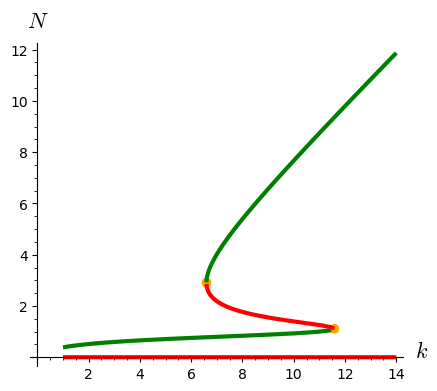

In [32]:
r = 0.55
k, N = var("k, N")
p = plot_bifurcation_diagram(r*N*(1 - N/k) - N^2 / (1 + N^2), (k, 1, 14), (N, -0.1, 12), plot_points=200)
p.show(xmin=0, aspect_ratio=1)

### In this diagram we see *two* saddle-node bifurcations. One is just like in the *lac operon* model, where two equilibrium points get closer and closer together, until they collide and disappear. The other is the reverse kind, where two new equilibrium points appear out of nowhere. 

<br>
<br>
<br>
<br>
<br>

<br>
<br>
<br>
<br>
<br>

<br>
<br>
<br>
<br>
<br>

# Other types of bifurcations besides saddle–node

### Consider the model $X' = rX - X^3$. 
### In this model, the state variable $X$ can be any real number (positive or negative). Likewise, the parameter $r$ can be any real number. 

<br>

### The interactive below lets you do the over-under method on this model, with $rX$ as the rate of increase (in black) and $X^3$ as the rate of decrease (in orange). 


In [38]:
@interact
def pf_equilibria(
            r=slider(-2, 2, 0.1, label="$r$", default=-1),
            show_eqpts=checkbox(default=False, label="Show equilibrium points")):
    increaserate(X) = r*X
    decreaserate(X) = X^3
    p = plot(increaserate(X), (X, -2, 2), color="black", legend_label="Increase rate")
    p += plot(decreaserate(X), (X, -2, 2), color="orange", legend_label="Decrease rate")
    if show_eqpts:
        vectorfield(X) = increaserate(X) - decreaserate(X)
        vf_deriv(X) = diff(vectorfield(X), X)
        eqpts = find_zeros_1D(vectorfield, (X, -2, 2))
        for eqpt in eqpts:
            stability = vf_deriv(eqpt)
            if stability < 0:
                color = "green"
            elif stability > 0:
                color = "red"
            else:
                color = "orange"
            p += point((eqpt, 0), color=color, size=50)
    p.show(ymin=-3, ymax=3, aspect_ratio=0.8, figsize=8, 
           axes_labels=("$X$", "Increase/Decrease rates"))


Interactive function <function pf_equilibria at 0x7f08cd6ac598> with 2 widgets
  r: TransformFloatSlider(value…

<br>
<br>
<br>
<br>
<br>

<br>
<br>
<br>
<br>
<br>

<br>
<br>
<br>
<br>
<br>

# The bifurcation diagram of the model we just saw

In [43]:
pf_bif_diagram = point(((-2, -2), (2, 2)), size=0, aspect_ratio=1, axes_labels=("$r$", "$X$"))

@interact
def pf_bifurc_diagram(r=slider(-2, 2, 0.2, label="$r$", default=-1)):
    global pf_bif_diagram
    increaserate(X) = r*X
    decreaserate(X) = X^3
    vectorfield(X) = increaserate(X) - decreaserate(X)
    vf_deriv(X) = diff(vectorfield(X), X)
    p = plot(increaserate(X), (X, -2, 2), color="black", legend_label="Increase rate", ymin=-3, ymax=3, 
             aspect_ratio=0.8, axes_labels=("$X$", "Increase/Decrease rates"))
    p += plot(decreaserate(X), (X, -2, 2), color="orange", legend_label="Decrease rate")
    pf_bif_diagram += line(((r, -2), (r, 2)), color="lightgray", linestyle="dashed", thickness=1)
    eqpts = find_zeros_1D(vectorfield, (X, -2, 2))
    for eqpt in eqpts:
        stability = vf_deriv(eqpt)
        if stability < 0:
            color = "green"
        elif stability > 0:
            color = "red"
        else:
            color = "orange"
        p += point((eqpt, 0), color=color, size=50)
        pf_bif_diagram += point((r, eqpt), color=color, size=50)
    both = graphics_array([[p, pf_bif_diagram]])
    both.show(figsize=11)


Interactive function <function pf_bifurc_diagram at 0x7f08c7a3d620> with 1 widget
  r: TransformFloatSlider(va…

<br>
<br>
<br>
<br>
<br>

<br>
<br>
<br>
<br>
<br>

<br>
<br>
<br>
<br>
<br>

# The completed bifurcation diagram of this model: 


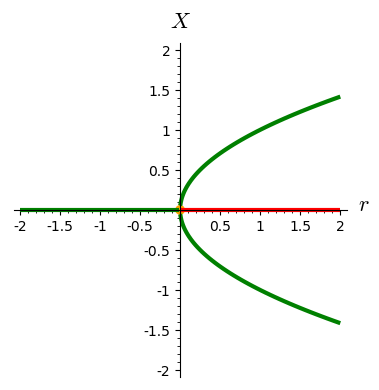

In [44]:
r, X = var("r, X")
p = plot_bifurcation_diagram(r*X - X^3, (r, -2, 2), (X, -2, 2))
p.show(aspect_ratio=1)

## This is called a ***pitchfork bifurcation***. 
(More specifically, it's a *supercritical* pitchfork bifurcation.)

<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>


## This can also happen with the stabilities exactly reversed: 
This is called a *subcritical* pitchfork bifurcation. 


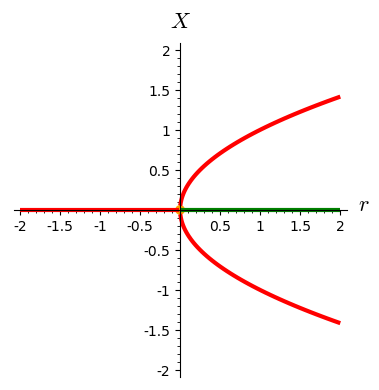

In [46]:
r, X = var("r, X")
p = plot_bifurcation_diagram(X^3 - r*X, (r, -2, 2), (X, -2, 2))
p.show(aspect_ratio=1)

<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>

# Of course, it can also happen as $r$ decreases instead of increases. 


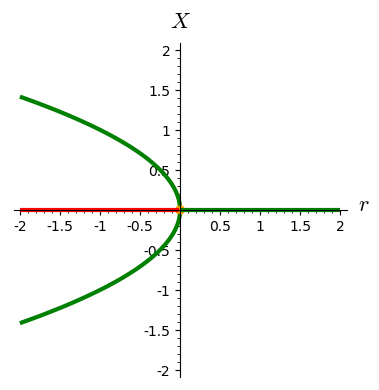

In [47]:
r, X = var("r, X")
p = plot_bifurcation_diagram(-r*X - X^3, (r, -2, 2), (X, -2, 2))
p.show(aspect_ratio=1)

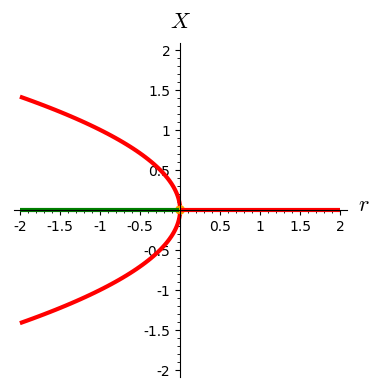

In [49]:
r, X = var("r, X")
p = plot_bifurcation_diagram(r*X + X^3, (r, -2, 2), (X, -2, 2))
p.show(aspect_ratio=1)

<br>
<br>
<br>
<br>
<br>

<br>
<br>
<br>
<br>
<br>

<br>
<br>
<br>
<br>
<br>

# One more example: The logistic model with the Allee effect

### Recall that this model was $N' = r \cdot N \cdot (1 - \frac{N}{k}) \cdot (\frac{N}{a} - 1)$

<br>

### We will fix $r = 0.1$ and $a = 10$, and vary the parameter $k$. There's not really an obvious way to use the over-under method here. But you can use the interactive below to see what happens as you vary the carrying capacity $k$. 


In [53]:
@interact
def tc_equilibria(
            k=slider(2, 60, 1, label="$k$", default=50),
            show_eqpts=checkbox(default=False, label="Show equilibrium points")):
    r = 0.1
    a = 10
    f(N) = r*N*(1 - N/k)*(N/a - 1)
    initial_states = (3.5, 9.5, 10.5, 20.5, 30.5, 40.5)
    t_range = srange(0, 50, 0.1)
    p1 = Graphics()
    for initial_state in initial_states:
        solution = desolve_odeint(f, initial_state, t_range, N)
        p1 += list_plot(list(zip(t_range, solution)), plotjoined=True, ymin=0, ymax=61, 
                        aspect_ratio=0.7, axes_labels=("$t$", "$N$"))
    p2 = plot(f(N), (N, 0, 60), color="orange", ymin=-5, ymax=5, 
              aspect_ratio=5, axes_labels=("$N$", "$f(N)$"))
    if show_eqpts:
        df(N) = diff(f(N), N)
        eqpts = find_zeros_1D(f, (N, 0, 120))
        for eqpt in eqpts:
            stability = df(eqpt)
            if stability < 0:
                color = "green"
            elif stability > 0:
                color = "red"
            else:
                color = "orange"
            p1 += line(((0, eqpt), (t_range[-1], eqpt)),
                       color=color, thickness=2, linestyle="dashed")
            p2 += point((eqpt, 0), color=color, size=50)
    p = graphics_array([[p1, p2]])
    p.show(figsize=11)


Interactive function <function tc_equilibria at 0x7f08cd5de950> with 2 widgets
  k: TransformIntSlider(value=5…

### Pay particular attention to what happens as you *decrease* $k$. This time, see if you can figure out what the bifurcation diagram should look like on your own, before scrolling down. 

<br>
<br>
<br>
<br>
<br>

<br>
<br>
<br>
<br>
<br>

<br>
<br>
<br>
<br>
<br>

<br>
<br>
<br>
<br>
<br>

<br>
<br>
<br>
<br>
<br>

<br>
<br>
<br>
<br>
<br>

# The bifurcation diagram of the Allee effect model


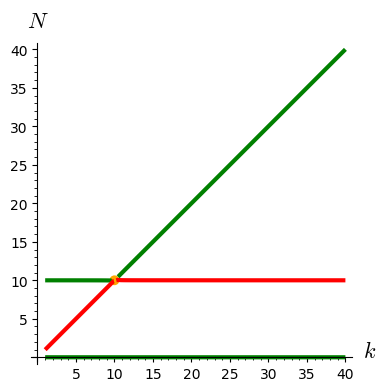

In [51]:
r = 0.1
a = 10
k, N = var("k, N")
p = plot_bifurcation_diagram(r*N*(1 - N/k)*(N/a - 1), (k, 1, 40), (N, -0.01, 40))
p.show(xmin=0, aspect_ratio=1)

### This is called a ***transcritical bifurcation***. 

<br>
<br>
<br>
<br>
<br>

<br>
<br>
<br>
<br>
<br>
